# ML - Project 2:  Unsupervised Learning

## 1

## Import the required libraries and load the data

In [1]:
# Importing all necessary libraries here
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# read data from .csv file and get a samples of data
db = pd.read_csv('renttherunway.csv')
db.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [4]:
db.shape

(192544, 16)

- There is 10 object columns in data
- and 4 integer columns and 2 float columns
- Total 16 Columns in given data with 192544 entries

In [5]:
db.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [6]:
db.describe(include = 'O')

,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,review_date
count,192544,174133,162562,192534,192482,177907,192199,192544,191867,192544
unique,3,106,190,9,191027,7,154736,68,24,2274
top,fit,34b,130lbs,wedding,.,hourglass,Stylist Review,dress,"5' 4""","June 15, 2016"
freq,142058,27285,14370,57784,63,55349,977,92884,28012,844


In [7]:
db['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

#### 
- Rating is an scale of 1-10
- 75% of people who rented clothes on below 37 years
- Most of the people rented **fit**
- Most people rent clothes for wedding
- Most rented category is **Dress**

## 2

## Data cleansing and Exploratory data analysis

In [8]:
# Checking for duplicate values
db.duplicated().sum()

0

In [9]:
# Function to drop redundant columns
def drop_col(col):
    return db.drop(col,inplace = True, axis = 1)

In [10]:
db.sample(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
106629,106629,fit,357382,32d,136110,130lbs,10.0,party,True to size. It was fully lined so nice in co...,hourglass,The color was truly amazing. A perfect dress f...,dress,"5' 4""",8,35.0,"November 13, 2015"
38073,38073,fit,429491,32c,141300,135lbs,8.0,wedding,everything was wonderful with this dress EXCEP...,athletic,The dress was perfectly elegant. It fit like a...,dress,NaN,8,26.0,"November 7, 2017"
138726,138726,fit,146524,NaN,616481,NaN,8.0,work,"Cute dress, I really liked the skirt pattern. ...",full bust,Cute dress (watch for the loose top),dress,"5' 3""",8,30.0,"August 15, 2016"
66104,66104,fit,549229,32b,2956453,118lbs,10.0,vacation,I definitely recommend this for flat chested g...,petite,Awesome top!,top,"5' 3""",1,29.0,"August 30, 2017"
84309,84309,fit,454199,34b,1621234,150lbs,10.0,formal affair,"I loved this dress, it was comfortable and the...",pear,Amazing dress - unique!!,sheath,"5' 7""",12,29.0,"October 9, 2015"


In [11]:
db.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')


- There is no duplicate values in the data
- But for now we don't need some columns to be in our data. Those redunt columns are
         [Unnamed: 0, user_id, item_id, review_text, review_summary, review_data]
- These redundant columns much won't affect our classification.


In [12]:
drop_col('Unnamed: 0')
drop_col('user_id')
drop_col('item_id')
drop_col('review_text')
drop_col('review_summary')
drop_col('review_date')
db.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
162274,small,36c,140lbs,10.0,party,hourglass,gown,"5' 2""",24,55.0
74879,fit,34c,123lbs,8.0,other,pear,gown,"5' 7""",9,22.0
99999,fit,36d,160lbs,10.0,formal affair,hourglass,gown,"5' 4""",8,30.0
22608,fit,32a,127lbs,10.0,everyday,hourglass,sweater,"5' 3""",4,28.0
43030,small,34b,145lbs,10.0,formal affair,athletic,gown,"5' 10""",13,29.0


In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  object 
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.7+ MB


Now we are with 11 columns instead 16

#### Working on a column 'height'
- Generally, Weight is a Numerical but here in the data weight is a object type due to string **lbs**
- So, We have to remove unnecessary string from the data and convert object type to float

In [14]:
db['weight'] = db['weight'].str.replace('lbs','').astype(float) #replacing lbs with empty string and convert data type as float

#### Working on a column 'rented for'

In [15]:
# Checking for unique columns in rented for column
db['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [16]:
db['rented for'].nunique()

9

In [17]:
# checking for number of values in each category
db['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

- Wedding is the most occcured category in rented for
- party: cocktail is the only occured once so we can merge it into party

In [18]:
db['rented for'] = db['rented for'].str.replace('party: cocktail','party') # replacing strings

In [19]:
db['rented for'].value_counts()

wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

#### Working on a column 'height'

- Need to convert height column into a float type

In [20]:
db['height'] = db['height'].str.replace("'",".")
db['height'] = db['height'].str.replace(' ','')
db['height'] = db['height'].str.replace('"','').astype(float)

In [21]:
db['height']

0         5.8
1         5.6
2         5.4
3         5.5
4         5.9
         ... 
192539    5.9
192540    5.1
192541    5.8
192542    5.6
192543    5.6
Name: height, Length: 192544, dtype: float64

In [22]:
db['height'].describe()

count    191867.000000
mean          5.475109
std           0.267875
min           4.100000
25%           5.300000
50%           5.500000
75%           5.700000
max           6.600000
Name: height, dtype: float64

#### 
- Minimum height in the customers is **4 feet 1 inch** and maximum height of **6 feet 6 inches**.
- 50 % of the people are under **5 feet 5 inches**

#### Imputing missing values

In [23]:
db.isna().sum()

fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [24]:
db.isnull().sum()/len(db)*100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [25]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  float64
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


#### 
- There is null values in except **fit,category,size**
- So, we have to impute them with mean,median, mode values
- Here, I am replacing null values with mean value
- weight has 15% of null values
- [bust size, rented for,body type] are objective types so, we can replace it with **mode** value

In [26]:
# Function to impute null values
def impute_null(col,strategy):
    if strategy == 'mean':
        db[col] = db[col].fillna(db[col].mean())
    else:
        db[col] = db[col].fillna(db[col].mode()[0])

In [27]:
# replacing null values
impute_null('bust size','mode')
impute_null('weight','mean')
impute_null('rating','mean')
impute_null('rented for','mode')
impute_null('body type','mode')
impute_null('height','mean')
impute_null('age','mode')

In [28]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


- Age should be integer so, we convert it into integer data type from float

In [29]:
db['age'] = db['age'].astype(int) # Converting age from float to int

#### Statistical Summery

In [30]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 14.0+ MB


In [31]:
db.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,137.391709,9.092371,5.475109,12.245175,33.856703
std,20.122771,1.429740,0.267404,8.494877,8.040513
min,50.000000,2.000000,4.100000,0.000000,0.000000
25%,125.000000,8.000000,5.300000,8.000000,29.000000
50%,137.391709,10.000000,5.500000,12.000000,32.000000
75%,145.000000,10.000000,5.700000,16.000000,37.000000
max,300.000000,10.000000,6.600000,58.000000,117.000000


In [32]:
db.describe(include = 'O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


### Views

- 75% of the people are 145lbs(65.8kg) or below than that. And maximum weight is 300lbs(136kg).
- Minimum rating for products is 2 and maximum 10.
- Average height of customers is 5.47 inches.
- 8 to 16 size for the most customers.
- 75% customers are 37 years or below than that.
- fit has 3 classes in that fit is the most occured.
- bust size has 106 uniques and body type has 7 unique types.
- Most people rented for wedding occations.
- Most rented category is dress.

#### Outliers

<AxesSubplot:xlabel='age'>

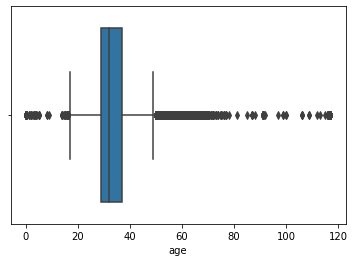

In [33]:
sns.boxplot(data = db, x = 'age') #Box plot to observe the outliers

In [34]:
db['age'].skew() #Skewness of the data

1.5091483502487972

In [35]:
Q1 = db['age'].quantile(0.25)
Q3 = db['age'].quantile(0.75)
IQR = Q3 - Q1
lower_tail = Q1 - 1.5*IQR
upper_tail = Q3 + 1.5*IQR
for i in db['age']:
    if i > upper_tail or i < lower_tail:
        db['age'] = db['age'].replace(i,np.median(db['age']))

- We will mark that the data point above the 75% of the data consider as a outlier and we have to convert this outlier with in the range
- We use median value (at 50%) for convert outlier as a within range value

In [36]:
db['age'].skew() #checking for skewness

0.5701260480910298

<AxesSubplot:xlabel='age'>

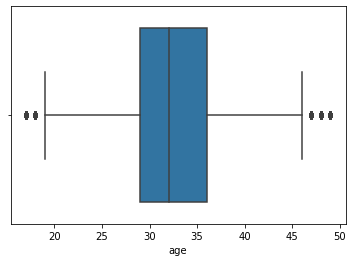

In [37]:
sns.boxplot(data = db, x = 'age') # Box plot after dealing with outliers

In [38]:
db.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,137.391709,9.092371,5.475109,12.245175,32.620030
std,20.122771,1.429740,0.267404,8.494877,5.908415
min,50.000000,2.000000,4.100000,0.000000,17.000000
25%,125.000000,8.000000,5.300000,8.000000,29.000000
50%,137.391709,10.000000,5.500000,12.000000,32.000000
75%,145.000000,10.000000,5.700000,16.000000,36.000000
max,300.000000,10.000000,6.600000,58.000000,49.000000


- Now the age column outliers are treated.
- The value above 75% convert it into a median value(50%).
- skewness changes from 1.51 to 0.57.
- Now, Maximum age is 49. 75% people are less than or equal to 36 years age
- mean age is 32.6 years

***rented for*** column

In [39]:
db['rented for'].unique() # Checking for unique columns in rented for column

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

In [40]:
db['rented for'].nunique()

8

In [41]:
db['rented for'].value_counts() # Count of each unique columns

wedding          57794
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

<AxesSubplot:xlabel='rented for', ylabel='count'>

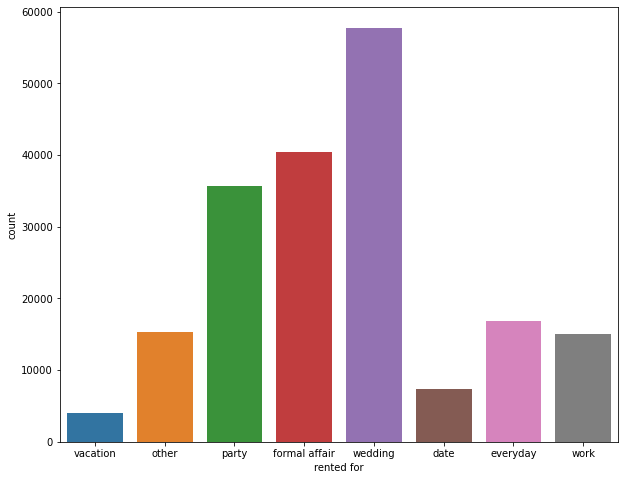

In [42]:
# Count plot to check distribution of data
figure(figsize = (10,8))
sns.countplot(data = db, x = 'rented for')

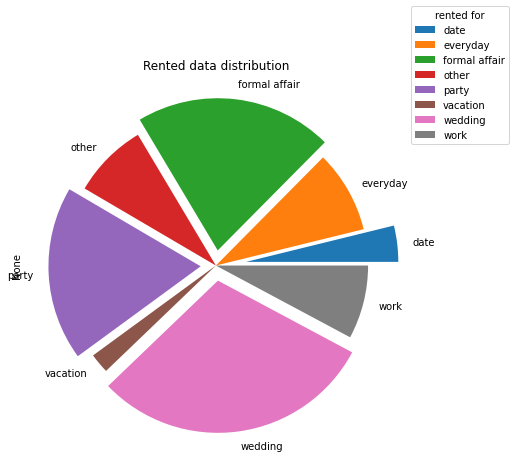

In [43]:
# pie chart for visualizing the distribution data
fig, ax = plt.subplots(figsize =(10, 7))
explode = (0.2, 0.0, 0.1, 0.0, 0.1, 0.0,0.1,0.0)
db.groupby('rented for').size().plot(kind = 'pie',explode = explode)
ax.legend(title = 'rented for',loc = 'center left',bbox_to_anchor =(1, 0, 1, 2))
ax.set_title('Rented data distribution')
plt.show()

- Most people rented for wedding, later formal affair.
- Vaccation is the least rented category


## 3

## Data Preparation for model building

In [44]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 14.0+ MB


In [45]:
db[['fit','bust size','rented for','body type','category']].sample(5)

,fit,bust size,rented for,body type,category
40980,fit,34b,party,athletic,dress
78409,fit,34c,formal affair,straight & narrow,gown
81133,large,34c,date,full bust,dress
28288,fit,34d,other,hourglass,jumpsuit
171134,large,38d+,other,full bust,sheath


In [46]:
# Checking for unique values
encode = ['fit','bust size','rented for','body type','category']
for i in encode:
    print(f'\n unique types in {i}: ',db[i].unique())


 unique types in fit:  ['fit' 'small' 'large']

 unique types in bust size:  ['34d' '34b' '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '40ddd/e' '32a' '38d+' '38c' '34ddd/e'
 '38a' '38b' '38d' '36ddd/e' '38dd' '38f' '42dd' '36dd' '40g' '40dd' '28f'
 '30ddd/e' '32ddd/e' '28b' '36d+' '40d' '28dd' '34f' '42c' '30d' '30b'
 '42d' '34aa' '32aa' '36f' '28c' '40b' '36aa' '34g' '32f' '42ddd/e' '40c'
 '28g' '28aa' '36g' '30a' '44ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g'
 '38h' '30h' '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '32j' '46c' '48d' '38aa' '38i' '48dd' '28d' '28i' '46ddd/e' '42g' '44c'
 '42f' '40j' '38j' '46f' '44b' '44g' '42h' '40i' '44h']

 unique types in rented for:  ['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work']

 unique types in body type:  ['hourglass' 'straight & narrow' 'pear' 'athletic' 'full bust' 'petite'
 

In [47]:
# Checking for number of unique values
for i in encode:
    print(f'\n unique types in {i}: ',db[i].nunique())


 unique types in fit:  3

 unique types in bust size:  106

 unique types in rented for:  8

 unique types in body type:  7

 unique types in category:  68


- Fit,bust size,rented for,body type,category are need to be encoded
- fit,bust size is ordinal data so we can do label encoding 
- category have large number of uniques so we will go for label encoding
- remian rented for,body type we will do one hot encoding.

In [48]:
df = db.copy()
df.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
113517,large,34c,120.0,10.0,wedding,petite,gown,5.1,7,27
136256,fit,34b,137.0,10.0,work,straight & narrow,dress,5.8,12,49
15705,fit,34b,170.0,10.0,wedding,hourglass,gown,5.7,20,26
17894,fit,32b,95.0,10.0,formal affair,straight & narrow,gown,5.6,1,45
128059,small,34b,120.0,10.0,work,athletic,skirt,5.5,4,35


In [49]:
# label encoding the fit column
le = LabelEncoder()
df['fit'] = le.fit_transform(df['fit'])
df['bust size'] = le.fit_transform(df['bust size'])
df['category'] = le.fit_transform(df['category'])
df['body type'] = le.fit_transform(df['body type'])
df['rented for'] = le.fit_transform(df['rented for'])

In [50]:
df.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
175612,0,52,140.0,10.0,6,3,16,5.3,12,21
97455,0,26,125.0,6.0,0,4,45,5.3,8,29
67978,0,37,120.0,10.0,6,5,16,5.3,4,28
168720,0,37,125.0,8.0,4,1,45,5.5,12,32
105668,2,39,120.0,8.0,4,5,45,5.4,12,32


# one hot encoding of remaining categorical variables
df_1 = df.copy() # copy to new data frame
df_1 = pd.get_dummies(df_1[['rented for']])
df_1.sample(5)

# finalising the dataframe with encoded columns
df = df.join(df_1)
df.drop(['rented for'],inplace = True, axis = 1)
df.sample(5)

### Standardize the data

In [51]:
scale = StandardScaler()
df_stan = pd.DataFrame(scale.fit_transform(df),columns = df.columns)
df_stan

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,-1.946601e-02,0.634822,0.514420,0.020953,1.569310,1.214986,0.206575,-0.781943
1,-0.556291,-0.187210,-2.679414e-01,0.634822,-0.456753,1.927582,-0.307247,0.467052,-0.028862,0.572062
2,-0.556291,-0.187210,-1.412419e-15,0.634822,0.028833,0.020953,1.647500,-0.280882,-0.970608,-0.104940
3,-0.556291,-0.095925,-1.188562e-01,-0.764037,-0.942340,0.656496,-0.620006,0.093085,-0.499735,0.233561
4,-0.556291,-0.187210,3.780946e-01,0.634822,1.000007,-1.250132,-0.307247,1.588953,-0.028862,-0.951193
...,...,...,...,...,...,...,...,...,...,...
192539,-0.556291,0.177930,1.296192e-01,0.634822,1.485593,0.020953,0.161892,1.588953,-0.499735,1.587565
192540,-0.556291,-1.282633,-1.858184e+00,0.634822,1.485593,1.292039,-0.620006,-1.402783,-0.970608,-0.612692
192541,-0.556291,0.816927,-1.188562e-01,-2.162897,-1.427926,1.927582,-0.620006,1.214986,-0.499735,-0.274191
192542,-0.556291,1.090783,1.371996e+00,0.634822,1.000007,0.656496,-0.620006,0.467052,0.442012,-0.274191


In [52]:
df_stan.describe()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
count,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05,1.925440e+05
mean,1.192319e-15,-2.136651e-15,-1.723086e-15,5.010205e-15,-1.316925e-16,-1.328403e-15,-1.627556e-15,-5.634004e-15,8.200926e-16,5.754617e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-5.562907e-01,-3.564764e+00,-4.342938e+00,-4.960616e+00,-1.913513e+00,-1.885675e+00,-1.871045e+00,-5.142453e+00,-1.441481e+00,-2.643699e+00
25%,-5.562907e-01,-3.697809e-01,-6.158069e-01,-7.640372e-01,-9.423396e-01,-1.250132e+00,-6.200064e-01,-6.548488e-01,-4.997349e-01,-6.126921e-01
50%,-5.562907e-01,-9.592525e-02,-1.412419e-15,6.348225e-01,2.883347e-02,2.095327e-02,-6.200064e-01,9.308527e-02,-2.886160e-02,-1.049404e-01
75%,8.481600e-01,8.169270e-01,3.780946e-01,6.348225e-01,1.000007e+00,6.564961e-01,1.618924e-01,8.410193e-01,4.420117e-01,5.720619e-01
max,2.252611e+00,6.020185e+00,8.080831e+00,6.348225e-01,1.485593e+00,1.927582e+00,3.367678e+00,4.206723e+00,5.386181e+00,2.772319e+00


## 4

## Principal Component Analysis and Clustering

### Apply PCA for dimensionality Reduction

In [53]:
# Calculating covarinace matrix
cov_matrix = np.cov(df_stan.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519e+00  9.05525666e-03  1.34138344e-02 -2.45017128e-01
   8.35378787e-03 -7.61016810e-03  3.35892077e-04 -1.39837737e-03
   6.54006939e-02 -1.12167030e-03]
 [ 9.05525666e-03  1.00000519e+00  5.74163260e-01 -2.09463072e-02
  -2.07814670e-03 -2.15702411e-01 -1.09647683e-02  9.81215143e-02
   6.27115858e-01  1.40814161e-01]
 [ 1.34138344e-02  5.74163260e-01  1.00000519e+00 -2.06828900e-02
   9.91868005e-03 -2.35893510e-01 -1.48283310e-02  2.29390488e-01
   7.32740552e-01  6.51855408e-02]
 [-2.45017128e-01 -2.09463072e-02 -2.06828900e-02  1.00000519e+00
   1.28842617e-02  4.73487321e-03 -2.36044968e-02  9.83034748e-03
  -3.67259761e-02 -4.88572357e-02]
 [ 8.35378787e-03 -2.07814670e-03  9.91868005e-03  1.28842617e-02
   1.00000519e+00 -9.08626233e-03 -5.76351186e-02 -8.67134761e-03
   4.87422452e-03 -1.90663485e-02]
 [-7.61016810e-03 -2.15702411e-01 -2.35893510e-01  4.73487321e-03
  -9.08626233e-03  1.00000519e+00 -1.85295641e-03 -1.28525577e-01
  -2.14155816

In [54]:
# Calculating eigen values and eigen vectors
eign_vals, eign_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eign_vecs)
print('\n')
print('Eigen values:','\n',eign_vals)

Eigen vectors: 
 [[-0.04002732 -0.05396233  0.03180086 -0.68349147 -0.68861313  0.17824724
  -0.13009484  0.02202252  0.04968218 -0.03841733]
 [-0.5110456  -0.12438571  0.81337369  0.02536149  0.02434051 -0.03838315
   0.17357419  0.00916705  0.15725993 -0.06428199]
 [-0.54993263 -0.65428447 -0.4737493   0.05007317  0.039279    0.04118232
  -0.03005199 -0.1018772   0.15732365 -0.05717149]
 [ 0.03878623 -0.00701714 -0.00221656  0.70106636 -0.70617847 -0.02628575
   0.04058534  0.0133285   0.07577954 -0.00104969]
 [-0.00384508  0.00309845  0.01365836  0.04283642  0.03750873  0.64316414
   0.25932263 -0.12680215  0.07214754  0.7031037 ]
 [ 0.2627004  -0.02158151  0.02394277 -0.05724301 -0.00143261 -0.03501125
   0.26852646 -0.81251842  0.36401061 -0.2462692 ]
 [ 0.00918917 -0.00764771  0.00559086 -0.09144341 -0.04196551 -0.63849148
  -0.22519581 -0.06177057  0.36832994  0.62596784]
 [-0.19455524  0.07233501  0.13163004  0.10745251 -0.00568657  0.08952978
  -0.64597406 -0.52484222 -0.46624

In [55]:
total = sum(eign_vals)
var_exp = [ (i/total)*100  for i in sorted(eign_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [24.87008333229061, 12.50334082833717, 10.699068314894939, 10.168519649513152, 9.443987624030987, 9.354979362672244, 8.604191193950845, 7.4951076269901815, 4.322652628757163, 2.5380694385627005]
Cummulative Variance Explained:  [ 24.87008333  37.37342416  48.07249248  58.24101213  67.68499975
  77.03997911  85.64417031  93.13927793  97.46193056 100.        ]


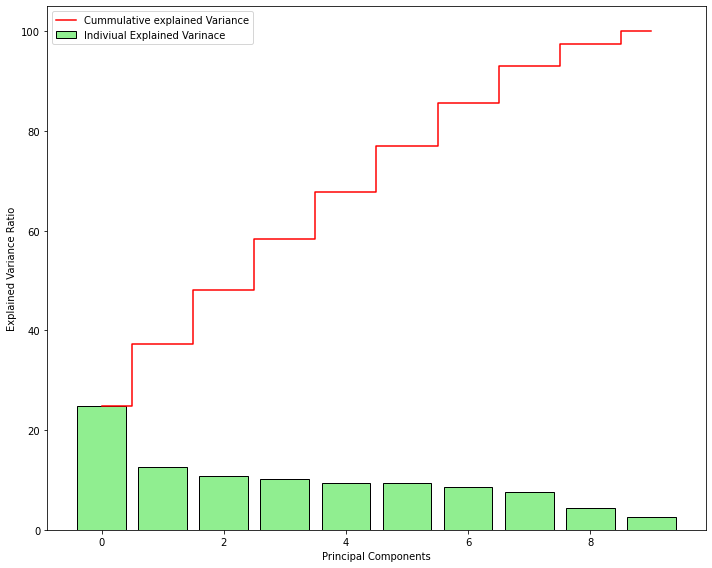

In [56]:
figure(figsize = (10,8))
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

- around 90% of the data variance explained by the first 7 variables
- So, we choose optimal number of principal components is 7.

In [57]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 7)
pca.fit(df_stan)

PCA(n_components=7)

In [58]:
data_pca = pca.transform(df_stan)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.172886,-0.918003,0.393209,-1.333259,1.332629,0.616192,-0.701105
1,-0.646848,-0.690799,0.452251,0.568091,-0.792868,-0.087402,-1.807189
2,-0.771474,-0.666071,1.131091,-0.264667,1.098342,0.620649,0.104724
3,-0.507408,0.194223,0.391385,0.126646,-1.093978,-0.466065,-0.440333
4,0.571190,-1.261381,-1.280160,-1.531671,0.825144,-0.579132,0.192521


### K - Means Clustering

In [59]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,1.649027e+06
1,2,1.359263e+06
2,3,1.226011e+06
3,4,1.113924e+06
4,5,1.019034e+06
5,6,9.621607e+05
6,7,9.138331e+05
7,8,8.811649e+05
8,9,8.499690e+05
9,10,8.231653e+05


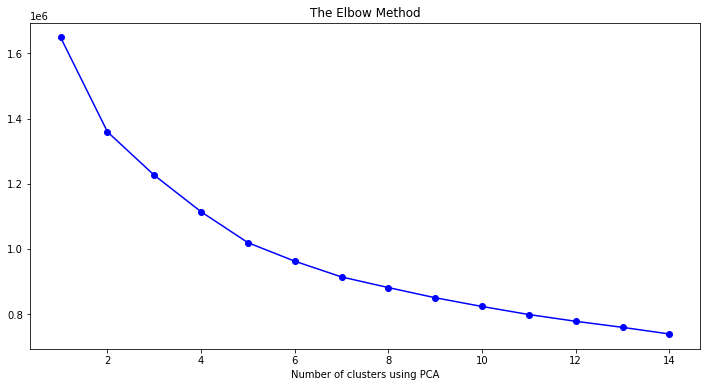

In [60]:
# Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- 2 or 3 consider as a optimal clusters from elbow method.
- here, we will take k = 3 as optimal clusters

In [61]:
# Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [62]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 1, 1, ..., 2, 0, 0])

In [63]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,1
1,1
2,1
3,1
4,1


In [64]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [65]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,39,137.000000,10.0,5,3,44,5.8,14,28,1
1,0,37,132.000000,10.0,3,6,20,5.6,12,36,1
2,0,37,137.391709,10.0,4,3,45,5.4,4,32,1
3,0,38,135.000000,8.0,2,4,16,5.5,8,34,1
4,0,37,145.000000,10.0,6,1,20,5.9,12,27,1


In [66]:
df_kmeans['Labels'].value_counts()

1    100400
0     54878
2     37266
Name: Labels, dtype: int64

In [67]:
# Checking for silhoutte score
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca.loc[0:10000])
    labels = kmeans.predict(data_pca.loc[0:10000])
    print(i,silhouette_score(data_pca.loc[0:10000],labels))

2 0.16659789137516784
3 0.15936786051866397
4 0.14049707969935374
5 0.1519407818386142
6 0.13469968051003706
7 0.1343801551071396
8 0.1386607970658218
9 0.13151156163087946
10 0.13030771928851828
11 0.13008555937564145
12 0.12453030640769687
13 0.12837784375623035
14 0.12769182040924612


- from silhoutte score we can say 2 or 3 are the optimal.
- So, the clusters are labelled as 0,1,2

## Agglomerative Clustering

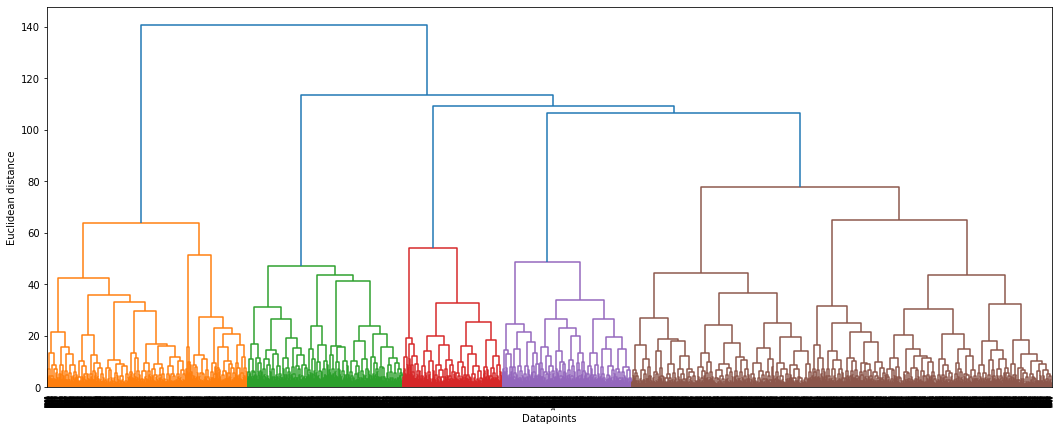

In [68]:
# plotting dendogram
plt.figure(figsize=[18,7])
merg = linkage(data_pca.loc[0:10000], method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [69]:
# Building hierarchical clustering model using the optimal clusters as 3
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca.loc[0:10000])

In [70]:
# Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,2
1,1
2,1
3,0
4,0


In [82]:
# joining the label dataframe with unscaled initial dataframe.(df)

df_hi = df.loc[0:10000].join(df_label1)
df_hi.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
5223,1,37,137.391709,10.0,2,3,20,5.1,21,35,0
9987,0,51,165.000000,8.0,2,1,10,5.9,20,40,0
9468,0,37,135.000000,10.0,2,3,20,5.4,16,40,0
7653,0,25,97.000000,10.0,6,5,45,5.2,4,27,1
5608,2,38,168.000000,8.0,6,3,16,5.1,20,30,0


In [83]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(data_pca.loc[0:10000])
    labels = hier.fit_predict(data_pca.loc[0:10000])
    print(i,silhouette_score(data_pca.loc[0:10000],labels))

2 0.14082444545193176
3 0.12888411489921478
4 0.11275052327750659
5 0.12181298071298084
6 0.09491005196235765
7 0.08474615636696771
8 0.09373894061130793
9 0.09051688413549693
10 0.09387492640405944
11 0.09417788068995916
12 0.09824265775449727
13 0.08196140896824063
14 0.0862384894880209


- from above we can say that silhoutte score is more for cluster 2 or 3.
- We came up with 3 clusters using K-means and 3 classes using agglomerative clustering.
- silhoutte score is also verify that 3 clusters are optimal in this case
- Further, we can also do the cluster analysis by doing bivariate analysis between cluster labels and different features and understand the characteristics of different groups.

### 5

## Conclusion

In [85]:
df_hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fit         10001 non-null  int32  
 1   bust size   10001 non-null  int32  
 2   weight      10001 non-null  float64
 3   rating      10001 non-null  float64
 4   rented for  10001 non-null  int32  
 5   body type   10001 non-null  int32  
 6   category    10001 non-null  int32  
 7   height      10001 non-null  float64
 8   size        10001 non-null  int64  
 9   age         10001 non-null  int32  
 10  Labels      10001 non-null  int64  
dtypes: float64(3), int32(6), int64(2)
memory usage: 625.2 KB


<AxesSubplot:xlabel='Labels', ylabel='category'>

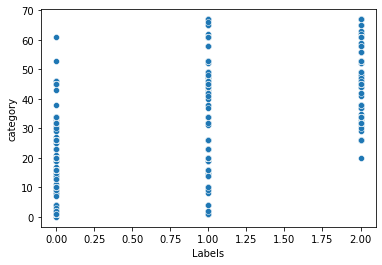

In [93]:
sns.scatterplot(df_hi['Labels'],df_hi['category'])

<AxesSubplot:xlabel='Labels', ylabel='bust size'>

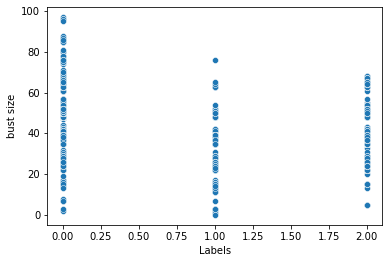

In [94]:
sns.scatterplot(df_hi['Labels'],df_hi['bust size'])

In [95]:
df_1 = db.loc[0:10000].join(df_label1)
df_1.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
8846,fit,34b,130.0,10.0,wedding,athletic,dress,5.5,8,30,0
3840,fit,36d,165.0,8.0,everyday,hourglass,dress,5.9,24,36,0
7259,large,32b,135.0,10.0,wedding,athletic,gown,5.7,4,30,0
4981,fit,34b,130.0,6.0,party,hourglass,romper,5.9,8,33,2
1056,fit,34a,135.0,8.0,work,petite,sheath,5.2,12,26,1


<AxesSubplot:xlabel='rented for', ylabel='count'>

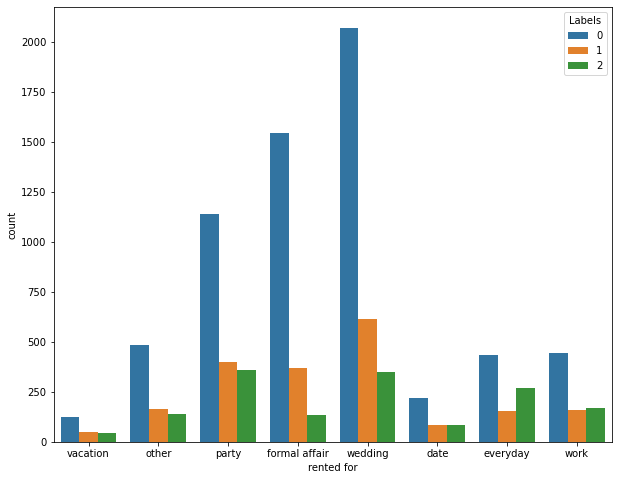

In [98]:
figure(figsize = (10,8))
sns.countplot(data = df_1, x = 'rented for', hue = 'Labels')

<AxesSubplot:xlabel='body type', ylabel='count'>

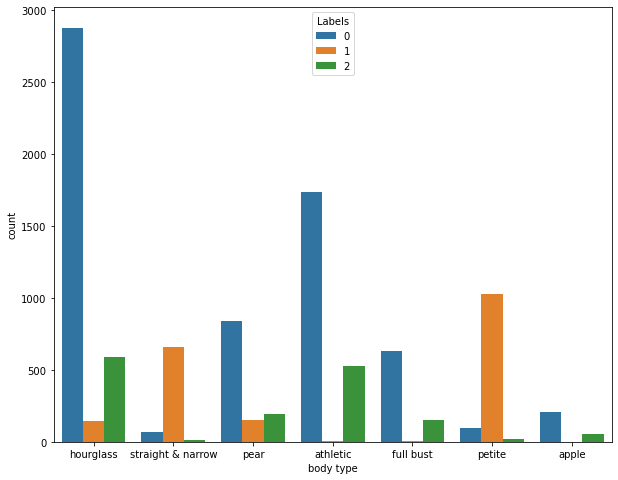

In [99]:
figure(figsize = (10,8))
sns.countplot(data = df_1, x = 'body type', hue = 'Labels')

<AxesSubplot:xlabel='bust size', ylabel='weight'>

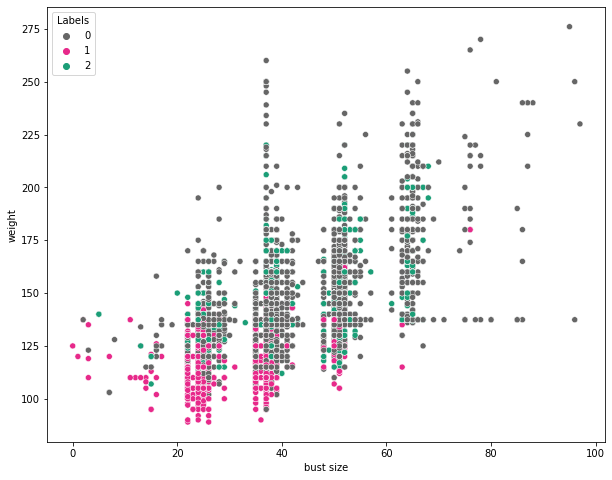

In [109]:
figure(figsize = (10,8))
sns.scatterplot(df_hi['bust size'],df_hi['weight'],hue = df_hi['Labels'],palette = 'Dark2_r')

<AxesSubplot:>

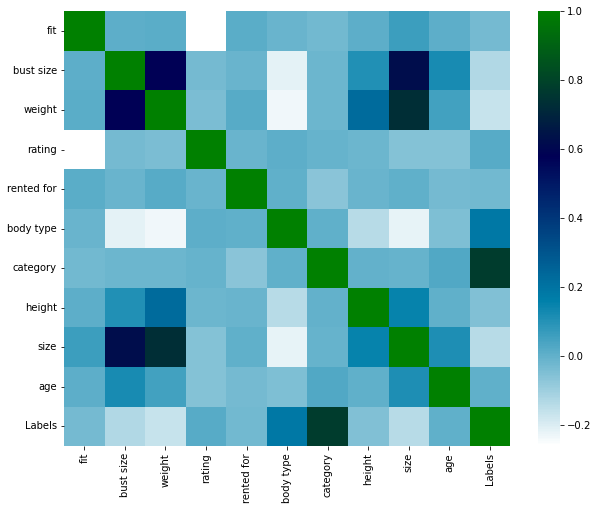

In [101]:
figure(figsize = (10,8))
sns.heatmap(df_hi.corr(),cmap = 'ocean_r')

#### Conclusion

- We made EDA for given data later scale the data and did PCA on the given data.
- In PCA 90% of the variance given by 7 components.
- We made cluster analysis through Kmean and Agglomerative analysis
- for 2 or 3 are the optimal clusters.
- category and labels have a correlation.
- mostly size, bust size, weight, height all are in correlation.
